In [1]:
import pandas as pd

# Load data
data = pd.read_csv('HateSpeechDatasetBalanced.csv')

Exploratory Data Analysis (EDA)

In [3]:
# Display basic information about the dataset
dataset_info = data.info()
dataset_head = data.head()

# Check for missing values
missing_values = data.isnull().sum()

dataset_info, dataset_head, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726119 entries, 0 to 726118
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  726119 non-null  object
 1   Label    726119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


(None,
                                              Content  Label
 0  denial of normal the con be asked to comment o...      1
 1  just by being able to tweet this insufferable ...      1
 2  that is retarded you too cute to be single tha...      1
 3  thought of a real badass mongol style declarat...      1
 4                                afro american basho      1,
 Content    0
 Label      0
 dtype: int64)

Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_7748\1215949127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='viridis')


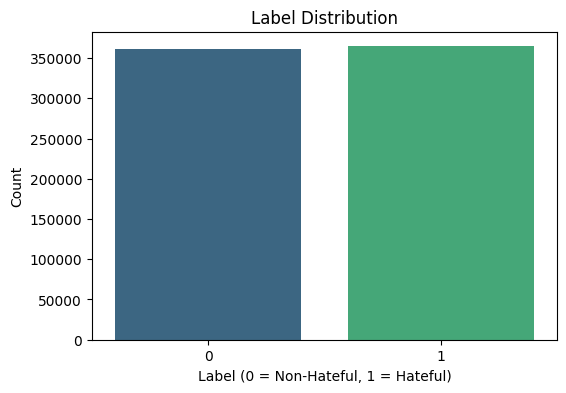

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=data, palette='viridis')
plt.title('Label Distribution')
plt.xlabel('Label (0 = Non-Hateful, 1 = Hateful)')
plt.ylabel('Count')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


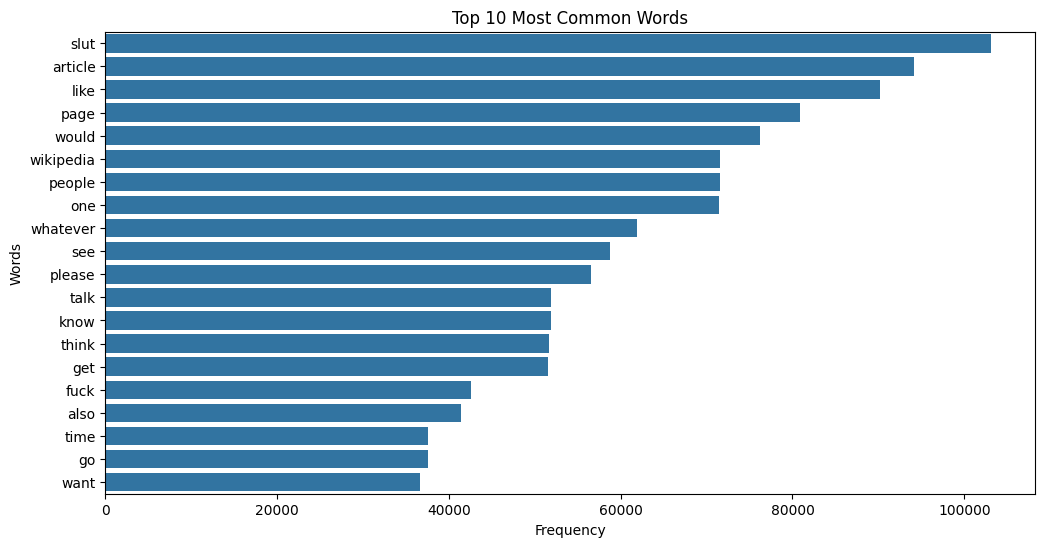

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean, tokenize, and remove stop words from text
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Split into tokens
    filtered_words = [word for word in tokens if word not in stop_words]  # Remove stop words
    return filtered_words

# Apply the clean_text function to all content in the dataset
all_words = [word for content in data['Content'] for word in clean_text(content)]
word_counts = Counter(all_words)

# Get the top 10 most common words
most_common_words = word_counts.most_common(20)

# Convert the most common words into a DataFrame for easier plotting
words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot most common words
plt.figure(figsize=(12,6))
sns.barplot(x='Frequency', y='Word', data=words_df)
plt.title('Top 10 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()
